In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('../analysis_table.csv')

/var/folders/m8/mtfhq9yn11l785hjqrbqdmnc0000gn/T/ipykernel_89737/509234851.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time_final_call['event_time'] = pd.to_datetime(df_time_final_call['event_time'])


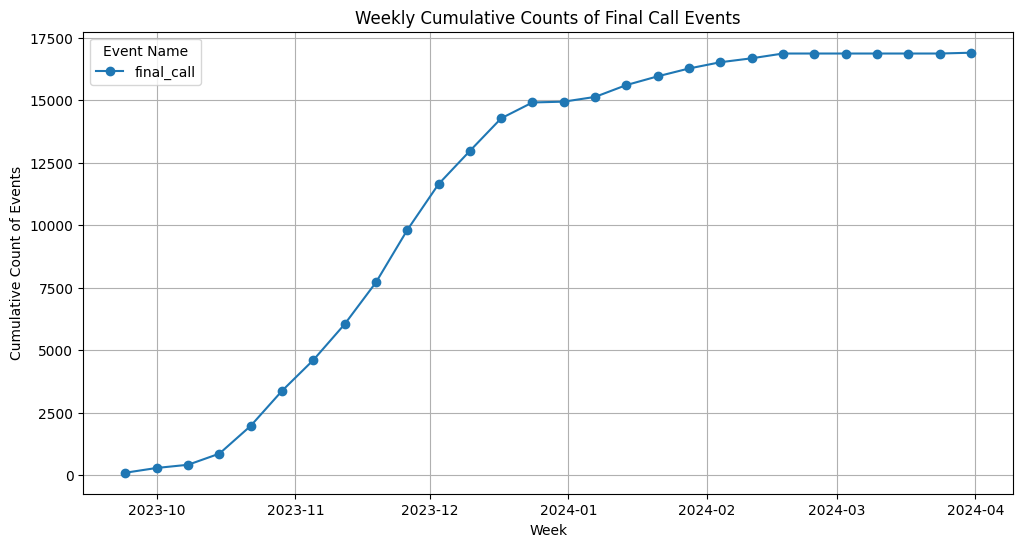

In [21]:
# Filter for only 'final_call' events
df_time_final_call = df[df['event_name'] == 'final_call']
df_time_final_call['event_time'] = pd.to_datetime(df_time_final_call['event_time'])

# Set 'event_time' as the index
df_time_final_call.set_index('event_time', inplace=True)

# Group by week and count the occurrences
event_weekly_counts_final_call = df_time_final_call.resample('W').size()

# Calculate the cumulative count
weekly_counts_final_call_cum = event_weekly_counts_final_call.cumsum()

# Reset index to turn the series back into a DataFrame and make it easy to plot
weekly_counts_final_call_cum = weekly_counts_final_call_cum.reset_index()
weekly_counts_final_call_cum.columns = ['Week', 'Cumulative Count']

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(weekly_counts_final_call_cum['Week'], weekly_counts_final_call_cum['Cumulative Count'], marker='o', label='final_call')
plt.title('Weekly Cumulative Counts of Final Call Events')
plt.xlabel('Week')
plt.ylabel('Cumulative Count of Events')
plt.legend(title='Event Name')
plt.grid(True)
plt.show()

/var/folders/m8/mtfhq9yn11l785hjqrbqdmnc0000gn/T/ipykernel_89737/3956482175.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['event_time'] = pd.to_datetime(df_time['event_time'])


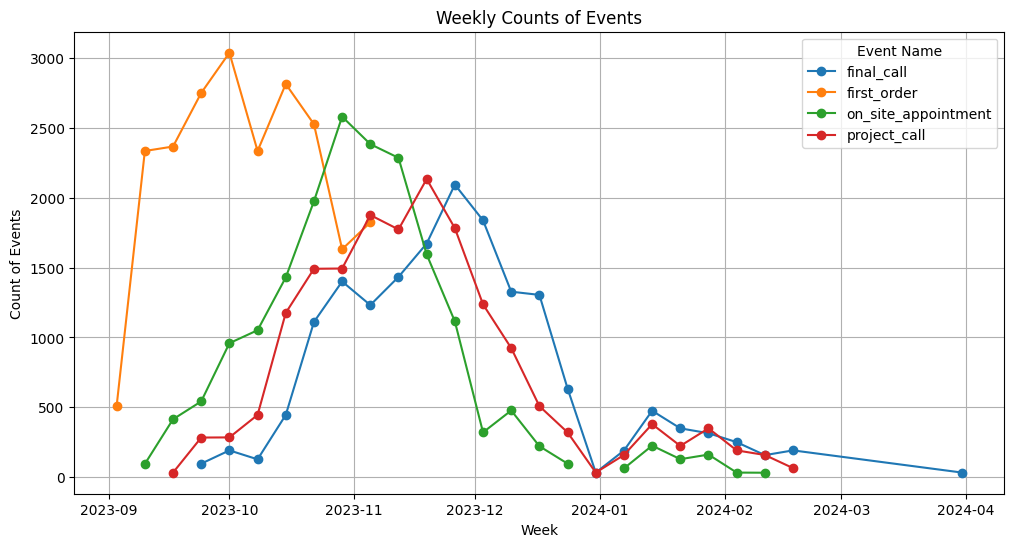

In [16]:
#Check Count over time per Event
#Filtering for 'event_name_unknown' negletable amount
df_time = df[df['event_name']!= 'event_name_unknown']

df_time['event_time'] = pd.to_datetime(df_time['event_time'])
df_time.set_index('event_time', inplace=True)
event_weekly_counts = df_time.groupby(['event_name', pd.Grouper(freq='W')]).size()
event_weekly_counts = event_weekly_counts.reset_index(name='count')

pivot_data = event_weekly_counts.pivot(index='event_time', columns='event_name', values='count')

# Plotting
plt.figure(figsize=(12, 6))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)
plt.title('Weekly Counts of Events')
plt.xlabel('Week')
plt.ylabel('Count of Events')
plt.legend(title='Event Name')
plt.grid(True)
plt.show()

event_name  final_call  first_order  on_site_appointment  project_call
event_time                                                            
2023-09-03         NaN          NaN                  NaN           NaN
2023-09-10         NaN       356.25                  NaN           NaN
2023-09-17         NaN         1.37               340.43           NaN
2023-09-24         NaN        16.22                30.92        784.38
2023-10-01       98.96        10.47                76.94          0.35
2023-10-08      -33.51       -23.16                 9.70         56.69
2023-10-15      250.39        20.55                35.93        164.27
2023-10-22      149.66       -10.23                38.18         26.87
2023-10-29       26.10       -35.44                30.67          0.13
2023-11-05      -12.06        11.76                -7.63         25.64
2023-11-12       16.40         0.00                -4.11         -5.49
2023-11-19       16.67         0.00               -30.26         20.35
2023-1

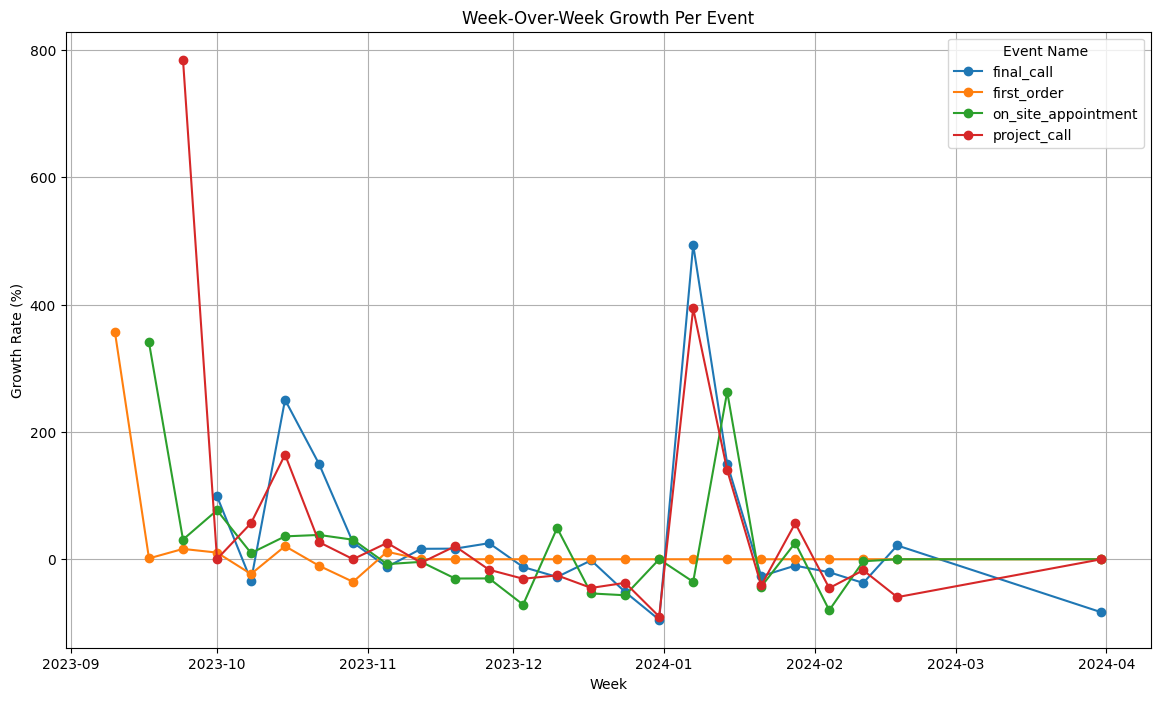

In [20]:
#Check weekly growth per event
week_over_week_growth = round(number=pivot_data.pct_change() * 100, ndigits=2)
print(week_over_week_growth)

#Plot
plt.figure(figsize=(14, 8))
for column in week_over_week_growth.columns:
    plt.plot(week_over_week_growth.index, week_over_week_growth[column], marker='o', label=column)

plt.title('Week-Over-Week Growth Per Event')
plt.xlabel('Week')
plt.ylabel('Growth Rate (%)')
plt.legend(title='Event Name')
plt.grid(True)
plt.show()

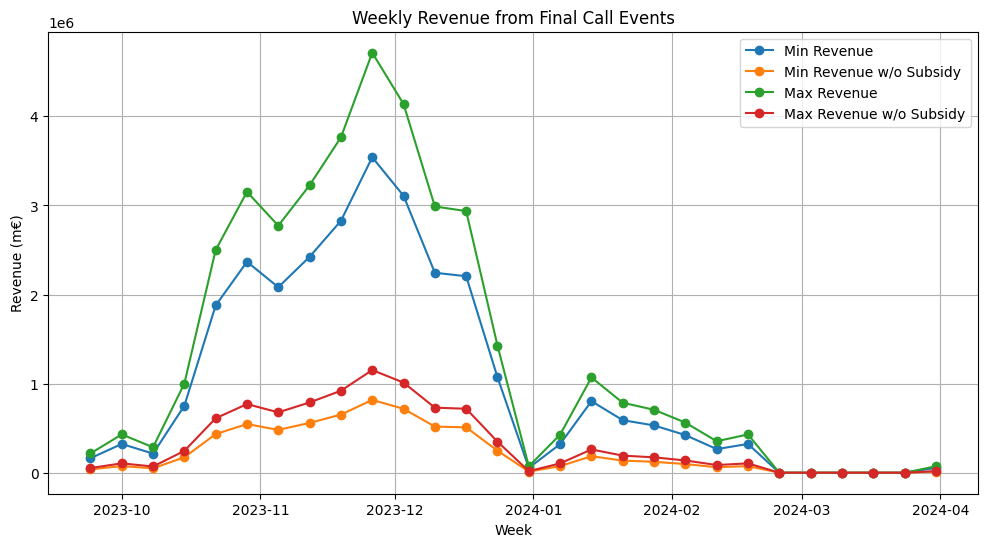

In [35]:
#Potential revenue

df['event_time'] = pd.to_datetime(df['event_time'])
df.set_index('event_time', inplace=True)

# Filter data for 'final_call' and group by week
final_call_counts = df[df['event_name'] == 'final_call'].resample('W').size()

# Calculate revenues
final_call_min_revenue = final_call_counts * 1690
final_call_max_revenue = final_call_counts * 2250
final_call_min_rev_no_sub = final_call_counts * 390
final_call_max_rev_no_sub = final_call_counts * 550

#Plotting
plt.figure(figsize=(12, 6))

# Plot minimum revenue
plt.plot(final_call_min_revenue.index, final_call_min_revenue, marker='o', linestyle='-', label='Min Revenue')
plt.plot(final_call_min_rev_no_sub.index, final_call_min_rev_no_sub, marker='o', linestyle='-', label='Min Revenue w/o Subsidy')

# Plot maximum revenue
plt.plot(final_call_max_revenue.index, final_call_max_revenue, marker='o', linestyle='-', label='Max Revenue')
plt.plot(final_call_max_rev_no_sub.index, final_call_max_rev_no_sub, marker='o', linestyle='-', label='Max Revenue w/o Subsidy')

plt.title('Weekly Revenue from Final Call Events')
plt.xlabel('Week')
plt.ylabel('Revenue (m€)')
plt.legend()
plt.grid(True)
plt.show()